In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Data Loading
df=pd.read_csv('../data/test(in).csv')
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [22]:
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Overview:
Shape: (2191, 4)
Columns: ['Subject', 'body', 'date', 'from']

Data Types:
Subject    object
body       object
date       object
from       object
dtype: object

Missing Values:
Subject    0
body       0
date       0
from       0
dtype: int64


In [23]:
from datetime import datetime
# Data Cleaning and Preparation
print("Starting Data Preprocessing...")

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any invalid dates
print(f"Invalid dates: {df['date'].isnull().sum()}")

# Fill missing dates with the most frequent date or drop if necessary
if df['date'].isnull().sum() > 0:
    df = df.dropna(subset=['date'])

# Extract year and month for time-based analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Unique employees (from column): {df['from'].nunique()}")

Starting Data Preprocessing...
Invalid dates: 0
Date range: 2010-01-01 00:00:00 to 2011-12-31 00:00:00
Unique employees (from column): 10


In [24]:
df.head()

,Subject,body,date,from,year,month,year_month
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010,5,2010-05
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010,7,2010-07
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011,7,2011-07
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,2010,3,2010-03
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,2011,5,2011-05


In [25]:
# Sentiment Analysis Function

import re
from textblob import TextBlob
def analyze_sentiment(text):
    """
    Analyze sentiment of text using TextBlob
    into 'Positive', 'Negative', or 'Neutral'
    """
    if pd.isna(text) or text == '':
        return 'Neutral'
    
    # Removing special characters and extra spaces
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    if len(text) < 3:  # Too short for meaningful analysis
        return 'Neutral'
    
    # Get sentiment polarity
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    # Classify based on polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

print("Performing Sentiment Analysis...")
# Apply sentiment analysis to each message
df['sentiment'] = df['body'].apply(analyze_sentiment)

# Add numerical scores for calculations
df['sentiment_score'] = df['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

Performing Sentiment Analysis...
Sentiment Distribution:
sentiment
Neutral     1068
Positive     954
Negative     169
Name: count, dtype: int64


In [26]:
df.head(3)

,Subject,body,date,from,year,month,year_month,sentiment,sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,2010,5,2010-05,Positive,1
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,2010,7,2010-07,Neutral,0
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,2011,7,2011-07,Neutral,0


## EDA(Exploratory Data Analysis)

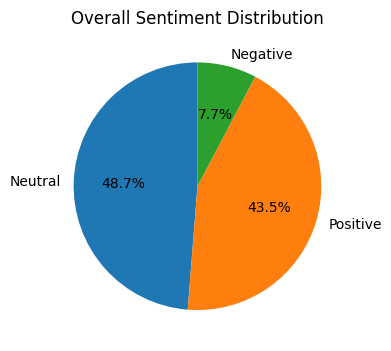

✓ Saved: sentiment_distribution.jpg


In [ ]:
# 1. Sentiment Distribution Pie Chart
plt.figure(figsize=(4, 4))
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Sentiment Distribution')
plt.tight_layout()
plt.savefig('../visualization/sentiment_distribution.jpg', dpi=100, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

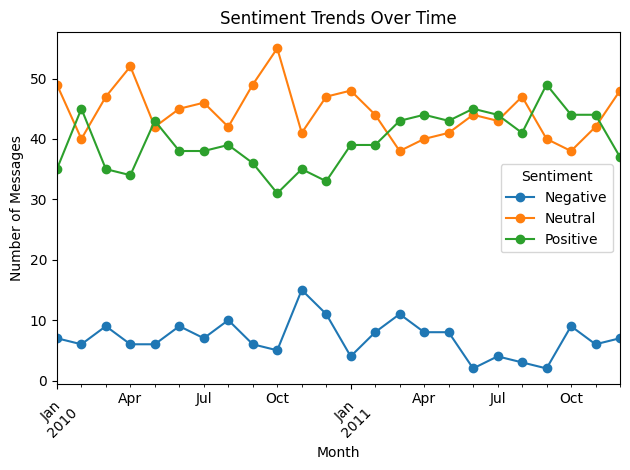

✓ Saved: sentiment_trends.jpg


In [ ]:
# 2. Sentiment Trends Over Time Line Chart
plt.figure(figsize=(10, 6))
monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
monthly_sentiment.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualization/sentiment_trends.jpg', dpi=300, bbox_inches='tight')
plt.show()

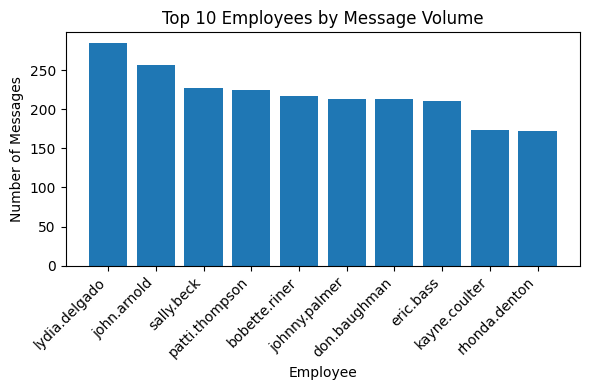

In [41]:
plt.figure(figsize=(6, 4))
top_employees = df['from'].value_counts().head(10)
plt.bar(range(len(top_employees)), top_employees.values)
plt.title('Top 10 Employees by Message Volume')
plt.xlabel('Employee')
plt.ylabel('Number of Messages')
plt.xticks(range(len(top_employees)), 
           [email.split('@')[0] for email in top_employees.index], 
           rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualization/top_employees_volume.jpg', dpi=300, bbox_inches='tight')
plt.show()
